In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics as mt

In [2]:
data=pd.read_csv(r"NSE-Tata-Global-Beverages-Limited.csv")
#df1=pd.DataFrame(data)
df=pd.DataFrame(data)
#df.shape
#df.describe()
df.dropna(inplace=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [3]:
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 77.3 KB


In [4]:
X=df.drop(["Close"],axis=1)
Y=df["Close"]
#X["Date"]=X["Date"].astype("Int64")//10*9

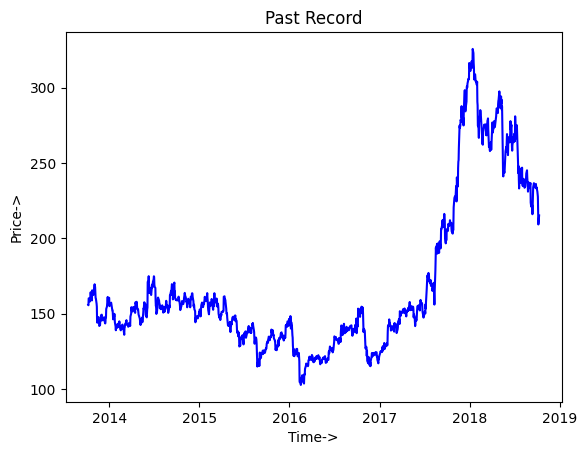

In [5]:
#plt.subplot(2,2,1)
plt.title("Past Record")
plt.xlabel("Time->")
plt.ylabel("Price->")
#plt.bar(df["Date"],df["Total Trade Quantity"],color="red")

#plt.subplot(2,2,2)
plt.plot(df["Date"],df["Close"],"blue")
     

In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
#X.drop(["Date"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)
x_train

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
97,2018-05-17,243.50,249.30,242.50,247.50,7108750.0,17573.66
622,2016-04-04,122.85,123.45,120.75,120.85,831737.0,1013.25
796,2015-07-20,138.20,142.55,138.20,141.45,2394358.0,3378.35
1073,2014-06-03,148.00,151.85,147.75,150.20,3014557.0,4531.68
196,2017-12-20,301.00,303.80,297.75,302.00,4692403.0,14149.92
...,...,...,...,...,...,...,...
763,2015-09-03,120.75,125.00,119.00,124.60,4688477.0,5772.22
835,2015-05-26,146.80,149.70,146.80,148.50,1118631.0,1662.47
1216,2013-11-03,168.00,170.00,167.25,169.50,512878.0,868.66
559,2016-07-05,134.25,136.15,133.20,133.75,942568.0,1269.10


In [8]:
linr=LinearRegression()
logr=LogisticRegression()
#X.drop(["Date"],axis=1,inplace=True)
#x_train=x_train.drop(["Date"],axis=1)
xtrn=x_train.drop(["Date"],axis=1)

In [9]:
xtst=x_test.drop(["Date"],axis=1)
linr.fit(xtrn,y_train)
linpred=linr.predict(xtst)

In [10]:
linr.score(xtrn,y_train)
#x_train["Date"].shape

0.9999365228805569

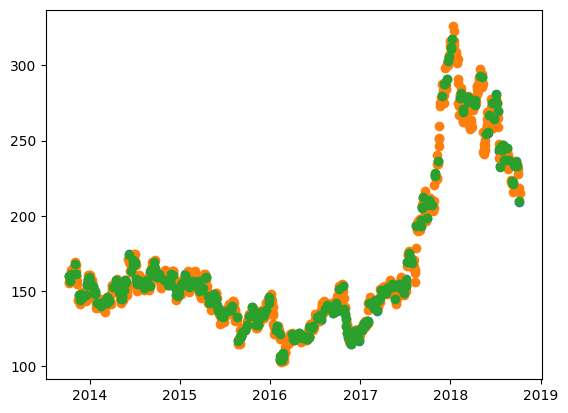

In [11]:
#plt.subplot(2,2,2)
plt.scatter(x_test["Date"],y_test)
plt.scatter(x_train["Date"],y_train)
plt.scatter(x_test["Date"],linpred)
plt.show()